# Telecom churn case study


## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


## Evaluation

 Goal It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability" Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard ## Metric Submissions are evaluated on [Classification Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) between the value of the predicted value and the actual value of churn for each of the customers. ![Accuracy score formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/7bfe40cea126a04004b82f729cf7df1ec435fbf6) The public leaderboard is going to rank your submission against other users while the competition is active, however, once the competition is ended, the final ranks will be calculated on the private leaderboard. ## Submission file format The file should contain a header and have the following format (CSV): ``` id,churn_probability 70005,0.0 70006,1.0 70007,0.0 etc. ``` A sample file can be found attached in the Data section of this competition.

In [1]:
# importing libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import re

In [2]:
# changing pandas max rows and columns settings to show every column and row
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
# reading both train and test data
df = pd.read_csv("./train.csv")
final_submission_dataframe = pd.read_csv("./test.csv")

In [4]:
# checking how data looks
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
# checking the shape of the data
df.shape

(69999, 172)

In [6]:
# importing the data dictionary
desc = pd.read_csv("./data_dictionary.csv")

In [7]:
# dividing all the variables in different category
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print('Numerical columns ->',len(num_cols))
print('Categorical columns ->',len(cat_cols))
print('Date columns ->',len(date_cols))




Numerical columns -> 156
Categorical columns -> 6
Date columns -> 9


In [8]:
# removing all the date columns as these are not important for analysis
df.drop(date_cols,inplace=True,axis=1)
final_submission_dataframe.drop(date_cols,inplace=True,axis=1)


In [9]:
# checking the number of unique values in each column
final_submission_dataframe.nunique()

id                    30000
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                27493
arpu_7                27406
arpu_8                26871
onnet_mou_6           12283
onnet_mou_7           12176
onnet_mou_8           12054
offnet_mou_6          16382
offnet_mou_7          16151
offnet_mou_8          16005
roam_ic_mou_6          3072
roam_ic_mou_7          2489
roam_ic_mou_8          2523
roam_og_mou_6          3661
roam_og_mou_7          3014
roam_og_mou_8          2933
loc_og_t2t_mou_6       7707
loc_og_t2t_mou_7       7639
loc_og_t2t_mou_8       7512
loc_og_t2m_mou_6      11835
loc_og_t2m_mou_7      11761
loc_og_t2m_mou_8      11600
loc_og_t2f_mou_6       2325
loc_og_t2f_mou_7       2359
loc_og_t2f_mou_8       2302
loc_og_t2c_mou_6       1403
loc_og_t2c_mou_7       1540
loc_og_t2c_mou_8       1557
loc_og_mou_6          14285
loc_og_mou_7          14154
loc_og_mou_8          13999
std_og_t2t_mou_6    

In [10]:
# checking the datatypes
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

In [11]:
# getting the columns with only one unique value
one_unique_value_columns = []
for column in df.columns:
    if df[column].nunique() == 1:
        one_unique_value_columns.append(column)
print("total columns with one unique value: ", len(one_unique_value_columns))

total columns with one unique value:  10


In [12]:
# removing columns with 1 unique value 
df.drop(one_unique_value_columns, axis=1, inplace=True)
final_submission_dataframe.drop(one_unique_value_columns, axis=1, inplace=True)
print("removed ",len(one_unique_value_columns))

removed  10


In [13]:
vars_with_50_percente_null_value = [feature for feature in df.columns if df[feature].isnull().mean()*100 >= 50]
vars_with_50_percente_null_value

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

```
These variables have more than 50% null values. Some of these variables are important for our analysis so we have to impute values.
Nan values in recharge suggest customers don't have any recharge plan for that month. we can impute zero to these variables.
```

In [14]:
# unimportant_vars = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']
unimportant_vars = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']

df.drop(unimportant_vars,inplace=True,axis=1)
final_submission_dataframe.drop(unimportant_vars,inplace=True,axis=1)

In [15]:
# removing dropped columns from vars_with_50_percente_null_value
for var in unimportant_vars:
    vars_with_50_percente_null_value.remove(var)

In [16]:
# imputing all the recharge columns with zero which denotes customer doesn't have any recharge plan for that month
recharge_cols = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7','max_rech_data_8']
for column in recharge_cols:
    df[column].fillna(0, inplace=True)
    final_submission_dataframe[column].fillna(0, inplace=True)


In [17]:
# creating a new category for categorical columns with null values
categorical_col = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8']
for column in categorical_col:
    df[column].fillna(-1, inplace=True)
    final_submission_dataframe[column].fillna(-1,inplace=True)


In [18]:
# imputing zero for average revenue where nan values are present
for feature in ['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']:
    df[feature].fillna(0,inplace=True)
    final_submission_dataframe[feature].fillna(0,inplace=True)

In [20]:
# checking the null values again.
df.isnull().mean()*100

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t

```
As we have different month data and they are not related to each other we will handle missing values month by month
```

### Month 6



In [21]:
# getting all the features for 6th month
sixth_month_columns = []
for column in df.columns:
    x = re.search("6$",column)
    if x:
        sixth_month_columns.append(column)

print("Total features for 6th month:", len(sixth_month_columns))

Total features for 6th month: 47


In [22]:
# checking the null values in 6th month features
df[sixth_month_columns].isnull().mean()*100

arpu_6                0.000000
onnet_mou_6           3.954342
offnet_mou_6          3.954342
roam_ic_mou_6         3.954342
roam_og_mou_6         3.954342
loc_og_t2t_mou_6      3.954342
loc_og_t2m_mou_6      3.954342
loc_og_t2f_mou_6      3.954342
loc_og_t2c_mou_6      3.954342
loc_og_mou_6          3.954342
std_og_t2t_mou_6      3.954342
std_og_t2m_mou_6      3.954342
std_og_t2f_mou_6      3.954342
std_og_mou_6          3.954342
isd_og_mou_6          3.954342
spl_og_mou_6          3.954342
og_others_6           3.954342
total_og_mou_6        0.000000
loc_ic_t2t_mou_6      3.954342
loc_ic_t2m_mou_6      3.954342
loc_ic_t2f_mou_6      3.954342
loc_ic_mou_6          3.954342
std_ic_t2t_mou_6      3.954342
std_ic_t2m_mou_6      3.954342
std_ic_t2f_mou_6      3.954342
std_ic_mou_6          3.954342
total_ic_mou_6        0.000000
spl_ic_mou_6          3.954342
isd_ic_mou_6          3.954342
ic_others_6           3.954342
total_rech_num_6      0.000000
total_rech_amt_6      0.000000
max_rech

In [23]:
# getting all the 6th month features with mou.
sixth_month_mou_columns = []
for column in df.columns:
    x = re.search("mou_6$",column)
    if x:
        sixth_month_mou_columns.append(column)



In [24]:
# checking the null values for 6th month mou features
df[sixth_month_mou_columns].isnull().mean().mul(100)

onnet_mou_6         3.954342
offnet_mou_6        3.954342
roam_ic_mou_6       3.954342
roam_og_mou_6       3.954342
loc_og_t2t_mou_6    3.954342
loc_og_t2m_mou_6    3.954342
loc_og_t2f_mou_6    3.954342
loc_og_t2c_mou_6    3.954342
loc_og_mou_6        3.954342
std_og_t2t_mou_6    3.954342
std_og_t2m_mou_6    3.954342
std_og_t2f_mou_6    3.954342
std_og_mou_6        3.954342
isd_og_mou_6        3.954342
spl_og_mou_6        3.954342
total_og_mou_6      0.000000
loc_ic_t2t_mou_6    3.954342
loc_ic_t2m_mou_6    3.954342
loc_ic_t2f_mou_6    3.954342
loc_ic_mou_6        3.954342
std_ic_t2t_mou_6    3.954342
std_ic_t2m_mou_6    3.954342
std_ic_t2f_mou_6    3.954342
std_ic_mou_6        3.954342
total_ic_mou_6      0.000000
spl_ic_mou_6        3.954342
isd_ic_mou_6        3.954342
dtype: float64

```
loc_og_mou_6, loc_ic_mou_6 etc are all different types of minutes of usage by customers. All the null values are following a pattern i.e. same null percentage. Best guess is that these customers do not use minutes or doesn't recharge for calling plan. We can further check by columns which show total minutes usage by customers.
```

In [25]:
# checking the total_ic_mou_6 and total_og_mou_6 for 0 where 6th month mou features are null

query = ' | '.join(['{} != {}'.format(k,k) for k in sixth_month_mou_columns])
df.query(query)[['total_og_mou_6','total_ic_mou_6']].head()


,total_og_mou_6,total_ic_mou_6
26,0.0,0.0
33,0.0,0.0
95,0.0,0.0
101,0.0,0.0
135,0.0,0.0


```
Where the 6th month mou variables are null total_og_mou_6 and total_ic_mou_6 is 0 which tells us that these customers either don't use the calling feature or they don't recharge for calls.
```

- We can impute zero for these variables whereever these are null

In [26]:
# handling missing values for mou (Minutes of usage  voice calls) columns.

for column in sixth_month_mou_columns:
    if df[column].isnull().sum() > 1:
        df[column].fillna(0,inplace=True)
        final_submission_dataframe[column].fillna(0,inplace=True)



In [27]:
# checking the 6th month  features null values after handling missing values
df[sixth_month_columns].isnull().mean().mul(100)

arpu_6                0.000000
onnet_mou_6           0.000000
offnet_mou_6          0.000000
roam_ic_mou_6         0.000000
roam_og_mou_6         0.000000
loc_og_t2t_mou_6      0.000000
loc_og_t2m_mou_6      0.000000
loc_og_t2f_mou_6      0.000000
loc_og_t2c_mou_6      0.000000
loc_og_mou_6          0.000000
std_og_t2t_mou_6      0.000000
std_og_t2m_mou_6      0.000000
std_og_t2f_mou_6      0.000000
std_og_mou_6          0.000000
isd_og_mou_6          0.000000
spl_og_mou_6          0.000000
og_others_6           3.954342
total_og_mou_6        0.000000
loc_ic_t2t_mou_6      0.000000
loc_ic_t2m_mou_6      0.000000
loc_ic_t2f_mou_6      0.000000
loc_ic_mou_6          0.000000
std_ic_t2t_mou_6      0.000000
std_ic_t2m_mou_6      0.000000
std_ic_t2f_mou_6      0.000000
std_ic_mou_6          0.000000
total_ic_mou_6        0.000000
spl_ic_mou_6          0.000000
isd_ic_mou_6          0.000000
ic_others_6           3.954342
total_rech_num_6      0.000000
total_rech_amt_6      0.000000
max_rech

In [28]:
# imputing zero for ic_others_6 and og_others_6
df['ic_others_6'].fillna(0,inplace=True)
final_submission_dataframe['ic_others_6'].fillna(0,inplace=True)
df['og_others_6'].fillna(0,inplace=True)    
final_submission_dataframe['og_others_6'].fillna(0,inplace=True)    

In [29]:
# checking the 6th month  features null values after handling missing values
df[sixth_month_columns].isnull().mean().mul(100)

arpu_6                0.0
onnet_mou_6           0.0
offnet_mou_6          0.0
roam_ic_mou_6         0.0
roam_og_mou_6         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2c_mou_6      0.0
loc_og_mou_6          0.0
std_og_t2t_mou_6      0.0
std_og_t2m_mou_6      0.0
std_og_t2f_mou_6      0.0
std_og_mou_6          0.0
isd_og_mou_6          0.0
spl_og_mou_6          0.0
og_others_6           0.0
total_og_mou_6        0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_mou_6          0.0
std_ic_t2t_mou_6      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2f_mou_6      0.0
std_ic_mou_6          0.0
total_ic_mou_6        0.0
spl_ic_mou_6          0.0
isd_ic_mou_6          0.0
ic_others_6           0.0
total_rech_num_6      0.0
total_rech_amt_6      0.0
max_rech_amt_6        0.0
last_day_rch_amt_6    0.0
total_rech_data_6     0.0
max_rech_data_6       0.0
av_rech_amt_data_6    0.0
vol_2g_mb_6           0.0
vol_3g_mb_6 

### Month 7

In [30]:
# getting all the features for 7th month
seventh_month_columns = []
for column in df.columns:
    x = re.search("7$",column)
    if x:
        seventh_month_columns.append(column)

print("Total features for 7th month:", len(seventh_month_columns))

Total features for 7th month: 47


In [31]:
# checking the null values in 7th month features
df[seventh_month_columns].isnull().mean()*100

arpu_7                0.000000
onnet_mou_7           3.838626
offnet_mou_7          3.838626
roam_ic_mou_7         3.838626
roam_og_mou_7         3.838626
loc_og_t2t_mou_7      3.838626
loc_og_t2m_mou_7      3.838626
loc_og_t2f_mou_7      3.838626
loc_og_t2c_mou_7      3.838626
loc_og_mou_7          3.838626
std_og_t2t_mou_7      3.838626
std_og_t2m_mou_7      3.838626
std_og_t2f_mou_7      3.838626
std_og_mou_7          3.838626
isd_og_mou_7          3.838626
spl_og_mou_7          3.838626
og_others_7           3.838626
total_og_mou_7        0.000000
loc_ic_t2t_mou_7      3.838626
loc_ic_t2m_mou_7      3.838626
loc_ic_t2f_mou_7      3.838626
loc_ic_mou_7          3.838626
std_ic_t2t_mou_7      3.838626
std_ic_t2m_mou_7      3.838626
std_ic_t2f_mou_7      3.838626
std_ic_mou_7          3.838626
total_ic_mou_7        0.000000
spl_ic_mou_7          3.838626
isd_ic_mou_7          3.838626
ic_others_7           3.838626
total_rech_num_7      0.000000
total_rech_amt_7      0.000000
max_rech

In [32]:
# getting all the 7th month features with mou.
seventh_month_mou_columns = []
for column in df.columns:
    x = re.search("mou_7$",column)
    if x:
        seventh_month_mou_columns.append(column)

In [33]:
# checking the null values for 7th month mou features
df[seventh_month_mou_columns].isnull().mean().mul(100)

onnet_mou_7         3.838626
offnet_mou_7        3.838626
roam_ic_mou_7       3.838626
roam_og_mou_7       3.838626
loc_og_t2t_mou_7    3.838626
loc_og_t2m_mou_7    3.838626
loc_og_t2f_mou_7    3.838626
loc_og_t2c_mou_7    3.838626
loc_og_mou_7        3.838626
std_og_t2t_mou_7    3.838626
std_og_t2m_mou_7    3.838626
std_og_t2f_mou_7    3.838626
std_og_mou_7        3.838626
isd_og_mou_7        3.838626
spl_og_mou_7        3.838626
total_og_mou_7      0.000000
loc_ic_t2t_mou_7    3.838626
loc_ic_t2m_mou_7    3.838626
loc_ic_t2f_mou_7    3.838626
loc_ic_mou_7        3.838626
std_ic_t2t_mou_7    3.838626
std_ic_t2m_mou_7    3.838626
std_ic_t2f_mou_7    3.838626
std_ic_mou_7        3.838626
total_ic_mou_7      0.000000
spl_ic_mou_7        3.838626
isd_ic_mou_7        3.838626
dtype: float64

```
This is also following the same pattern as 7th month. loc_og_mou_7, loc_ic_mou_7 etc are all different types of minutes of usage by customers. All the null values are following a pattern i.e. same null percentage. Best guess is that these customers do not use minutes or doesn't recharge for calling plan. We can further check by columns which show total minutes usage by customers.
```

In [34]:
# checking the total_ic_mou_7 and total_og_mou_7 for 0 where 7th month mou features are null

query = ' | '.join(['{} != {}'.format(k,k) for k in seventh_month_mou_columns])
df.query(query)[['total_og_mou_7','total_ic_mou_7']].head()

,total_og_mou_7,total_ic_mou_7
33,0.0,0.0
37,0.0,0.0
54,0.0,0.0
59,0.0,0.0
101,0.0,0.0


```
Where the 7th month mou variables are null total_og_mou_7 and total_ic_mou_7 is 0 which tells us that these customers either don't use the calling feature or they don't recharge for calls.
```

- We can impute zero for these variables whereever these are null

In [35]:
# handling missing values for mou (Minutes of usage  voice calls) columns.

for column in seventh_month_mou_columns:
    if df[column].isnull().sum() > 1:
        df[column].fillna(0,inplace=True)
        final_submission_dataframe[column].fillna(0,inplace=True)


In [36]:
# checking the 7th month  features null values after handling missing values
df[seventh_month_columns].isnull().mean().mul(100)

arpu_7                0.000000
onnet_mou_7           0.000000
offnet_mou_7          0.000000
roam_ic_mou_7         0.000000
roam_og_mou_7         0.000000
loc_og_t2t_mou_7      0.000000
loc_og_t2m_mou_7      0.000000
loc_og_t2f_mou_7      0.000000
loc_og_t2c_mou_7      0.000000
loc_og_mou_7          0.000000
std_og_t2t_mou_7      0.000000
std_og_t2m_mou_7      0.000000
std_og_t2f_mou_7      0.000000
std_og_mou_7          0.000000
isd_og_mou_7          0.000000
spl_og_mou_7          0.000000
og_others_7           3.838626
total_og_mou_7        0.000000
loc_ic_t2t_mou_7      0.000000
loc_ic_t2m_mou_7      0.000000
loc_ic_t2f_mou_7      0.000000
loc_ic_mou_7          0.000000
std_ic_t2t_mou_7      0.000000
std_ic_t2m_mou_7      0.000000
std_ic_t2f_mou_7      0.000000
std_ic_mou_7          0.000000
total_ic_mou_7        0.000000
spl_ic_mou_7          0.000000
isd_ic_mou_7          0.000000
ic_others_7           3.838626
total_rech_num_7      0.000000
total_rech_amt_7      0.000000
max_rech

In [37]:
# imputing zero for ic_others_7 and og_others_7
df['ic_others_7'].fillna(0,inplace=True)
final_submission_dataframe['ic_others_7'].fillna(0,inplace=True)
df['og_others_7'].fillna(0,inplace=True)    
final_submission_dataframe['og_others_7'].fillna(0,inplace=True)    

In [38]:
# checking the 7th month  features null values after handling missing values
df[seventh_month_columns].isnull().mean().mul(100)

arpu_7                0.0
onnet_mou_7           0.0
offnet_mou_7          0.0
roam_ic_mou_7         0.0
roam_og_mou_7         0.0
loc_og_t2t_mou_7      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2c_mou_7      0.0
loc_og_mou_7          0.0
std_og_t2t_mou_7      0.0
std_og_t2m_mou_7      0.0
std_og_t2f_mou_7      0.0
std_og_mou_7          0.0
isd_og_mou_7          0.0
spl_og_mou_7          0.0
og_others_7           0.0
total_og_mou_7        0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_mou_7          0.0
std_ic_t2t_mou_7      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2f_mou_7      0.0
std_ic_mou_7          0.0
total_ic_mou_7        0.0
spl_ic_mou_7          0.0
isd_ic_mou_7          0.0
ic_others_7           0.0
total_rech_num_7      0.0
total_rech_amt_7      0.0
max_rech_amt_7        0.0
last_day_rch_amt_7    0.0
total_rech_data_7     0.0
max_rech_data_7       0.0
av_rech_amt_data_7    0.0
vol_2g_mb_7           0.0
vol_3g_mb_7 

### Month 8

In [39]:
# getting all the features for 8th month
eighth_month_columns = []
for column in df.columns:
    x = re.search("8$",column)
    if x:
        eighth_month_columns.append(column)

print("Total features for 8th month:", len(eighth_month_columns))

Total features for 8th month: 47


In [40]:
# checking the null values in 8th month features
df[eighth_month_columns].isnull().mean()*100

arpu_8                0.000000
onnet_mou_8           5.290076
offnet_mou_8          5.290076
roam_ic_mou_8         5.290076
roam_og_mou_8         5.290076
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_8      5.290076
loc_og_mou_8          5.290076
std_og_t2t_mou_8      5.290076
std_og_t2m_mou_8      5.290076
std_og_t2f_mou_8      5.290076
std_og_mou_8          5.290076
isd_og_mou_8          5.290076
spl_og_mou_8          5.290076
og_others_8           5.290076
total_og_mou_8        0.000000
loc_ic_t2t_mou_8      5.290076
loc_ic_t2m_mou_8      5.290076
loc_ic_t2f_mou_8      5.290076
loc_ic_mou_8          5.290076
std_ic_t2t_mou_8      5.290076
std_ic_t2m_mou_8      5.290076
std_ic_t2f_mou_8      5.290076
std_ic_mou_8          5.290076
total_ic_mou_8        0.000000
spl_ic_mou_8          5.290076
isd_ic_mou_8          5.290076
ic_others_8           5.290076
total_rech_num_8      0.000000
total_rech_amt_8      0.000000
max_rech

In [41]:
# getting all the 8th month features with mou.
eighth_month_mou_columns = []
for column in df.columns:
    x = re.search("mou_8$",column)
    if x:
        eighth_month_mou_columns.append(column)

In [42]:
# checking the null values for 8th month mou features
df[eighth_month_mou_columns].isnull().mean().mul(100)

onnet_mou_8         5.290076
offnet_mou_8        5.290076
roam_ic_mou_8       5.290076
roam_og_mou_8       5.290076
loc_og_t2t_mou_8    5.290076
loc_og_t2m_mou_8    5.290076
loc_og_t2f_mou_8    5.290076
loc_og_t2c_mou_8    5.290076
loc_og_mou_8        5.290076
std_og_t2t_mou_8    5.290076
std_og_t2m_mou_8    5.290076
std_og_t2f_mou_8    5.290076
std_og_mou_8        5.290076
isd_og_mou_8        5.290076
spl_og_mou_8        5.290076
total_og_mou_8      0.000000
loc_ic_t2t_mou_8    5.290076
loc_ic_t2m_mou_8    5.290076
loc_ic_t2f_mou_8    5.290076
loc_ic_mou_8        5.290076
std_ic_t2t_mou_8    5.290076
std_ic_t2m_mou_8    5.290076
std_ic_t2f_mou_8    5.290076
std_ic_mou_8        5.290076
total_ic_mou_8      0.000000
spl_ic_mou_8        5.290076
isd_ic_mou_8        5.290076
dtype: float64

```
This is following the same pattern as 6th and 7th month. loc_og_mou_8, loc_ic_mou_8 etc are all different types of minutes of usage by customers. All the null values are following a pattern i.e. same null percentage. Best guess is that these customers do not use minutes or doesn't recharge for calling plan. We can further check by columns which show total minutes usage by customers.
```

In [43]:
# checking the total_ic_mou_8 and total_og_mou_8 for 0 where 8th month mou features are null

query = ' | '.join(['{} != {}'.format(k,k) for k in eighth_month_mou_columns])
df.query(query)[['total_og_mou_8','total_ic_mou_8']].head()

,total_og_mou_8,total_ic_mou_8
31,0.0,0.0
37,0.0,0.0
41,0.0,0.0
59,0.0,0.0
76,0.0,0.0


```
Where the 8th month mou variables are null total_og_mou_8 and total_ic_mou_8 is 0 which tells us that these customers either don't use the calling feature or they don't recharge for calls.
```

- We can impute zero for these variables whereever these are null

In [44]:
# handling missing values for mou (Minutes of usage  voice calls) columns.

for column in eighth_month_mou_columns:
    if df[column].isnull().sum() > 1:
        df[column].fillna(0,inplace=True)
        final_submission_dataframe[column].fillna(0,inplace=True)

In [45]:
# checking the 8th month  features null values after handling missing values
df[eighth_month_columns].isnull().mean().mul(100)

arpu_8                0.000000
onnet_mou_8           0.000000
offnet_mou_8          0.000000
roam_ic_mou_8         0.000000
roam_og_mou_8         0.000000
loc_og_t2t_mou_8      0.000000
loc_og_t2m_mou_8      0.000000
loc_og_t2f_mou_8      0.000000
loc_og_t2c_mou_8      0.000000
loc_og_mou_8          0.000000
std_og_t2t_mou_8      0.000000
std_og_t2m_mou_8      0.000000
std_og_t2f_mou_8      0.000000
std_og_mou_8          0.000000
isd_og_mou_8          0.000000
spl_og_mou_8          0.000000
og_others_8           5.290076
total_og_mou_8        0.000000
loc_ic_t2t_mou_8      0.000000
loc_ic_t2m_mou_8      0.000000
loc_ic_t2f_mou_8      0.000000
loc_ic_mou_8          0.000000
std_ic_t2t_mou_8      0.000000
std_ic_t2m_mou_8      0.000000
std_ic_t2f_mou_8      0.000000
std_ic_mou_8          0.000000
total_ic_mou_8        0.000000
spl_ic_mou_8          0.000000
isd_ic_mou_8          0.000000
ic_others_8           5.290076
total_rech_num_8      0.000000
total_rech_amt_8      0.000000
max_rech

In [46]:
# imputing zero for ic_others_8 and og_others_8
df['ic_others_8'].fillna(0,inplace=True)
final_submission_dataframe['ic_others_8'].fillna(0,inplace=True)
df['og_others_8'].fillna(0,inplace=True)    
final_submission_dataframe['og_others_8'].fillna(0,inplace=True)    

In [47]:
# checking the 8th month  features null values after handling missing values
df[eighth_month_columns].isnull().mean().mul(100)

arpu_8                0.0
onnet_mou_8           0.0
offnet_mou_8          0.0
roam_ic_mou_8         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_8          0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_8      0.0
std_og_mou_8          0.0
isd_og_mou_8          0.0
spl_og_mou_8          0.0
og_others_8           0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_mou_8          0.0
std_ic_t2t_mou_8      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2f_mou_8      0.0
std_ic_mou_8          0.0
total_ic_mou_8        0.0
spl_ic_mou_8          0.0
isd_ic_mou_8          0.0
ic_others_8           0.0
total_rech_num_8      0.0
total_rech_amt_8      0.0
max_rech_amt_8        0.0
last_day_rch_amt_8    0.0
total_rech_data_8     0.0
max_rech_data_8       0.0
av_rech_amt_data_8    0.0
vol_2g_mb_8           0.0
vol_3g_mb_8 

In [48]:
# checking the null values again.
df.isnull().mean().mul(100)

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

In [49]:
len(df.columns)

147

In [51]:
# dropping the id variable
df.drop("id",inplace=True,axis=1)
final_submission_dataframe.drop("id",inplace=True,axis=1)

```
All null values handled
```

### Filtering high value customers

In [52]:
df[['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7','total_rech_data_8','av_rech_amt_data_8']].describe()

,total_rech_data_6,av_rech_amt_data_6,total_rech_data_7,av_rech_amt_data_7,total_rech_data_8,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,48.395787,0.683981,51.415168,0.697867,51.782975
std,1.762010,126.923180,1.943193,133.246541,1.973434,131.291162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.000000,1.000000,17.000000,1.000000,23.000000
max,61.000000,5920.000000,54.000000,4365.000000,60.000000,4076.000000


In [53]:
# calculate the total data recharge amount month 6, 7--> number of recharges * average recharge amount
df['data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']



final_submission_dataframe['data_rech_6'] = final_submission_dataframe['total_rech_data_6'] * final_submission_dataframe['av_rech_amt_data_6']
final_submission_dataframe['data_rech_7'] = final_submission_dataframe['total_rech_data_7'] * final_submission_dataframe['av_rech_amt_data_7']

In [54]:
# checking the statistical info after creating total data recharge amount
df[['total_rech_amt_6','total_rech_amt_7']].describe()

,total_rech_amt_6,total_rech_amt_7
count,69999.000000,69999.000000
mean,328.139788,322.376363
std,404.211068,411.070120
min,0.000000,0.000000
25%,110.000000,100.000000
50%,229.000000,220.000000
75%,438.000000,430.000000
max,35190.000000,40335.000000


In [55]:
# calculate total recharge amount for month 6 and 7 --> call recharge amount + data recharge amount
df['total_rech_6'] = df['total_rech_amt_6'] + df['data_rech_6']
df['total_rech_7'] = df['total_rech_amt_7'] + df['data_rech_7']




final_submission_dataframe['total_rech_6'] = final_submission_dataframe['total_rech_amt_6'] + final_submission_dataframe['data_rech_6']
final_submission_dataframe['total_rech_7'] = final_submission_dataframe['total_rech_amt_7'] + final_submission_dataframe['data_rech_7']

In [56]:
# creating a new variable which stores average total reacharge for 6th and 7th month
df['average_recharge_6n7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
final_submission_dataframe['average_recharge_6n7'] = (final_submission_dataframe['total_rech_amt_6'] + final_submission_dataframe['total_rech_amt_7'])/2
df['average_recharge_6n7'].describe(percentiles=[.25,.5,.7,.75,.90,.95,.99])

count    69999.000000
mean       325.258075
std        376.172653
min          0.000000
25%        115.000000
50%        229.000000
70%        370.000000
75%        419.750000
90%        697.500000
95%        937.500000
99%       1579.510000
max      37762.500000
Name: average_recharge_6n7, dtype: float64

In [57]:
# checking the 70th percentile
df['average_recharge_6n7'].quantile(0.7)

370.0

In [58]:
# filtering the data to target high value customers
df = df[df['average_recharge_6n7'] >= df['average_recharge_6n7'].quantile(0.7)]

In [59]:
# checking statistical information on average recharge for 6th and 7th month
df['average_recharge_6n7'].describe(percentiles=[.25,.5,.7,.75,.90,.95,.99])

count    21018.000000
mean       695.807332
std        502.739093
min        370.000000
25%        450.000000
50%        568.000000
70%        733.000000
75%        795.000000
90%       1113.650000
95%       1399.500000
99%       2200.385000
max      37762.500000
Name: average_recharge_6n7, dtype: float64

In [60]:
# calculating diff
df['arpu_diff'] = df.arpu_8 - ((df.arpu_6 + df.arpu_7)/2)
df['onnet_mou_diff'] = df.onnet_mou_8 - ((df.onnet_mou_6 + df.onnet_mou_7)/2)
df['offnet_mou_diff'] = df.offnet_mou_8 - ((df.offnet_mou_6 + df.offnet_mou_7)/2)
df['roam_ic_mou_diff'] = df.roam_ic_mou_8 - ((df.roam_ic_mou_6 + df.roam_ic_mou_7)/2)
df['roam_og_mou_diff'] = df.roam_og_mou_8 - ((df.roam_og_mou_6 + df.roam_og_mou_7)/2)
df['loc_og_mou_diff'] = df.loc_og_mou_8 - ((df.loc_og_mou_6 + df.loc_og_mou_7)/2)
df['std_og_mou_diff'] = df.std_og_mou_8 - ((df.std_og_mou_6 + df.std_og_mou_7)/2)
df['isd_og_mou_diff'] = df.isd_og_mou_8 - ((df.isd_og_mou_6 + df.isd_og_mou_7)/2)
df['spl_og_mou_diff'] = df.spl_og_mou_8 - ((df.spl_og_mou_6 + df.spl_og_mou_7)/2)
df['total_og_mou_diff'] = df.total_og_mou_8 - ((df.total_og_mou_6 + df.total_og_mou_7)/2)
df['loc_ic_mou_diff'] = df.loc_ic_mou_8 - ((df.loc_ic_mou_6 + df.loc_ic_mou_7)/2)
df['std_ic_mou_diff'] = df.std_ic_mou_8 - ((df.std_ic_mou_6 + df.std_ic_mou_7)/2)
df['isd_ic_mou_diff'] = df.isd_ic_mou_8 - ((df.isd_ic_mou_6 + df.isd_ic_mou_7)/2)
df['spl_ic_mou_diff'] = df.spl_ic_mou_8 - ((df.spl_ic_mou_6 + df.spl_ic_mou_7)/2)
df['total_ic_mou_diff'] = df.total_ic_mou_8 - ((df.total_ic_mou_6 + df.total_ic_mou_7)/2)
df['total_rech_num_diff'] = df.total_rech_num_8 - ((df.total_rech_num_6 + df.total_rech_num_7)/2)
df['total_rech_amt_diff'] = df.total_rech_amt_8 - ((df.total_rech_amt_6 + df.total_rech_amt_7)/2)
df['max_rech_amt_diff'] = df.max_rech_amt_8 - ((df.max_rech_amt_6 + df.max_rech_amt_7)/2)
df['total_rech_data_diff'] = df.total_rech_data_8 - ((df.total_rech_data_6 + df.total_rech_data_7)/2)
df['max_rech_data_diff'] = df.max_rech_data_8 - ((df.max_rech_data_6 + df.max_rech_data_7)/2)
df['av_rech_amt_data_diff'] = df.av_rech_amt_data_8 - ((df.av_rech_amt_data_6 + df.av_rech_amt_data_7)/2)
df['vol_2g_mb_diff'] = df.vol_2g_mb_8 - ((df.vol_2g_mb_6 + df.vol_2g_mb_7)/2)
df['vol_3g_mb_diff'] = df.vol_3g_mb_8 - ((df.vol_3g_mb_6 + df.vol_3g_mb_7)/2)

In [61]:
# calculating diff for final submission dataframe
final_submission_dataframe['arpu_diff'] = final_submission_dataframe.arpu_8 - ((final_submission_dataframe.arpu_6 + final_submission_dataframe.arpu_7)/2)
final_submission_dataframe['onnet_mou_diff'] = final_submission_dataframe.onnet_mou_8 - ((final_submission_dataframe.onnet_mou_6 + final_submission_dataframe.onnet_mou_7)/2)
final_submission_dataframe['offnet_mou_diff'] = final_submission_dataframe.offnet_mou_8 - ((final_submission_dataframe.offnet_mou_6 + final_submission_dataframe.offnet_mou_7)/2)
final_submission_dataframe['roam_ic_mou_diff'] = final_submission_dataframe.roam_ic_mou_8 - ((final_submission_dataframe.roam_ic_mou_6 + final_submission_dataframe.roam_ic_mou_7)/2)
final_submission_dataframe['roam_og_mou_diff'] = final_submission_dataframe.roam_og_mou_8 - ((final_submission_dataframe.roam_og_mou_6 + final_submission_dataframe.roam_og_mou_7)/2)
final_submission_dataframe['loc_og_mou_diff'] = final_submission_dataframe.loc_og_mou_8 - ((final_submission_dataframe.loc_og_mou_6 + final_submission_dataframe.loc_og_mou_7)/2)
final_submission_dataframe['std_og_mou_diff'] = final_submission_dataframe.std_og_mou_8 - ((final_submission_dataframe.std_og_mou_6 + final_submission_dataframe.std_og_mou_7)/2)
final_submission_dataframe['isd_og_mou_diff'] = final_submission_dataframe.isd_og_mou_8 - ((final_submission_dataframe.isd_og_mou_6 + final_submission_dataframe.isd_og_mou_7)/2)
final_submission_dataframe['spl_og_mou_diff'] = final_submission_dataframe.spl_og_mou_8 - ((final_submission_dataframe.spl_og_mou_6 + final_submission_dataframe.spl_og_mou_7)/2)
final_submission_dataframe['total_og_mou_diff'] = final_submission_dataframe.total_og_mou_8 - ((final_submission_dataframe.total_og_mou_6 + final_submission_dataframe.total_og_mou_7)/2)
final_submission_dataframe['loc_ic_mou_diff'] = final_submission_dataframe.loc_ic_mou_8 - ((final_submission_dataframe.loc_ic_mou_6 + final_submission_dataframe.loc_ic_mou_7)/2)
final_submission_dataframe['std_ic_mou_diff'] = final_submission_dataframe.std_ic_mou_8 - ((final_submission_dataframe.std_ic_mou_6 + final_submission_dataframe.std_ic_mou_7)/2)
final_submission_dataframe['isd_ic_mou_diff'] = final_submission_dataframe.isd_ic_mou_8 - ((final_submission_dataframe.isd_ic_mou_6 + final_submission_dataframe.isd_ic_mou_7)/2)
final_submission_dataframe['spl_ic_mou_diff'] = final_submission_dataframe.spl_ic_mou_8 - ((final_submission_dataframe.spl_ic_mou_6 + final_submission_dataframe.spl_ic_mou_7)/2)
final_submission_dataframe['total_ic_mou_diff'] = final_submission_dataframe.total_ic_mou_8 - ((final_submission_dataframe.total_ic_mou_6 + final_submission_dataframe.total_ic_mou_7)/2)
final_submission_dataframe['total_rech_num_diff'] = final_submission_dataframe.total_rech_num_8 - ((final_submission_dataframe.total_rech_num_6 + final_submission_dataframe.total_rech_num_7)/2)
final_submission_dataframe['total_rech_amt_diff'] = final_submission_dataframe.total_rech_amt_8 - ((final_submission_dataframe.total_rech_amt_6 + final_submission_dataframe.total_rech_amt_7)/2)
final_submission_dataframe['max_rech_amt_diff'] = final_submission_dataframe.max_rech_amt_8 - ((final_submission_dataframe.max_rech_amt_6 + final_submission_dataframe.max_rech_amt_7)/2)
final_submission_dataframe['total_rech_data_diff'] = final_submission_dataframe.total_rech_data_8 - ((final_submission_dataframe.total_rech_data_6 + final_submission_dataframe.total_rech_data_7)/2)
final_submission_dataframe['max_rech_data_diff'] = final_submission_dataframe.max_rech_data_8 - ((final_submission_dataframe.max_rech_data_6 + final_submission_dataframe.max_rech_data_7)/2)
final_submission_dataframe['av_rech_amt_data_diff'] = final_submission_dataframe.av_rech_amt_data_8 - ((final_submission_dataframe.av_rech_amt_data_6 + final_submission_dataframe.av_rech_amt_data_7)/2)
final_submission_dataframe['vol_2g_mb_diff'] = final_submission_dataframe.vol_2g_mb_8 - ((final_submission_dataframe.vol_2g_mb_6 + final_submission_dataframe.vol_2g_mb_7)/2)
final_submission_dataframe['vol_3g_mb_diff'] = final_submission_dataframe.vol_3g_mb_8 - ((final_submission_dataframe.vol_3g_mb_6 + final_submission_dataframe.vol_3g_mb_7)/2)

In [62]:
# checking the shape of data after filtering high value customers
df.shape

(21018, 174)

In [63]:
# checking the target variable distribution
df['churn_probability'].value_counts(normalize=True)

0    0.911552
1    0.088448
Name: churn_probability, dtype: float64

```
Target variable is highly imbalanced. We have to balance class by using either smote or class_weights hyperparamter. We will decide this afterwards.
```

## Univariate Analysis

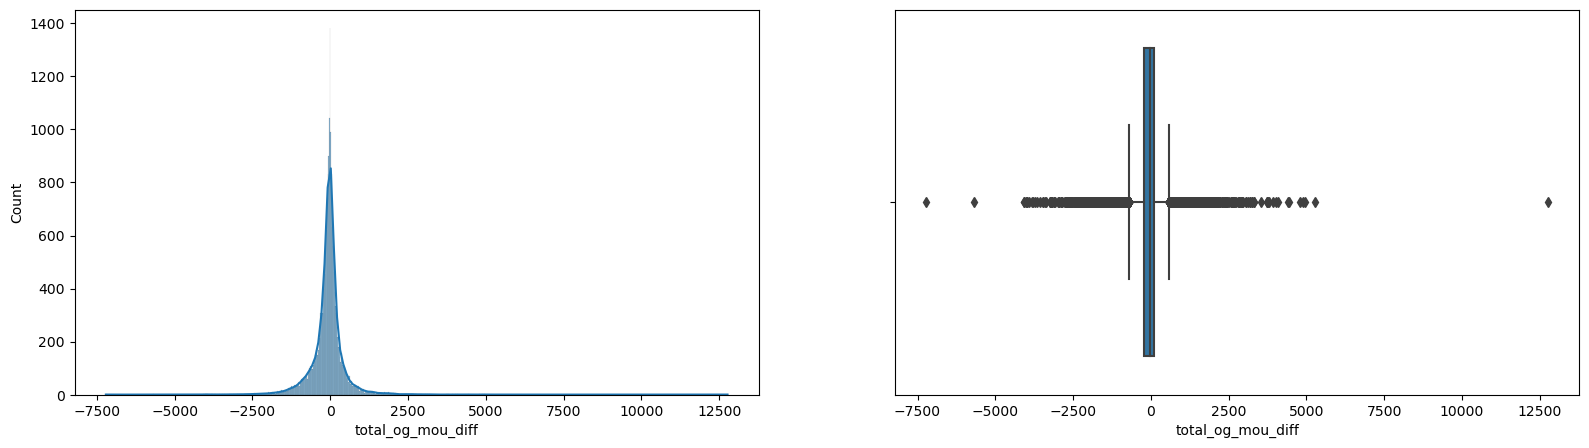

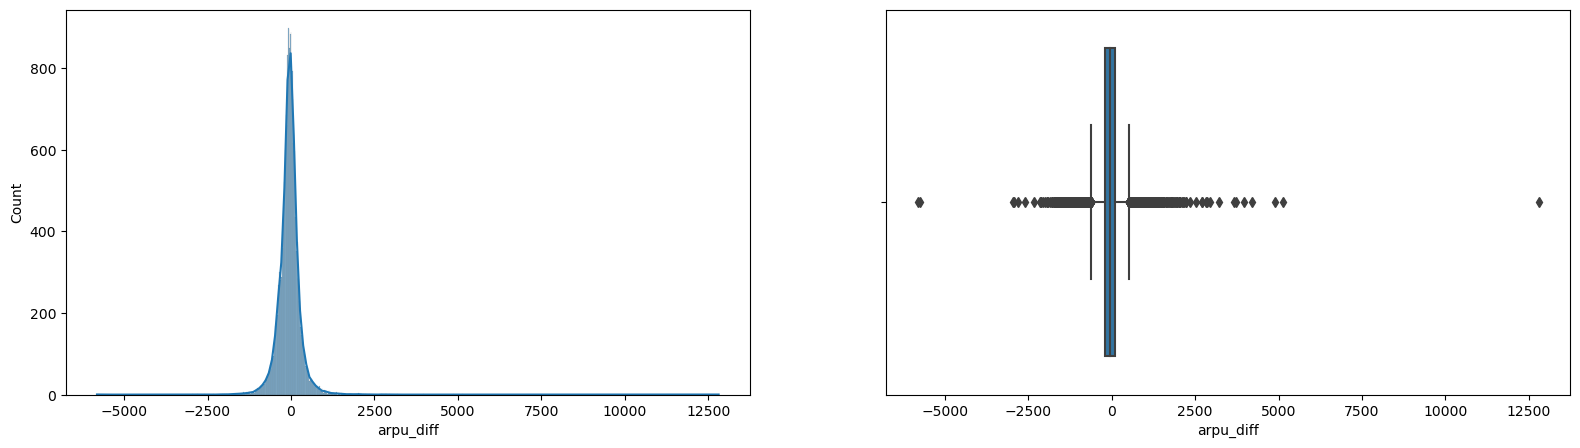

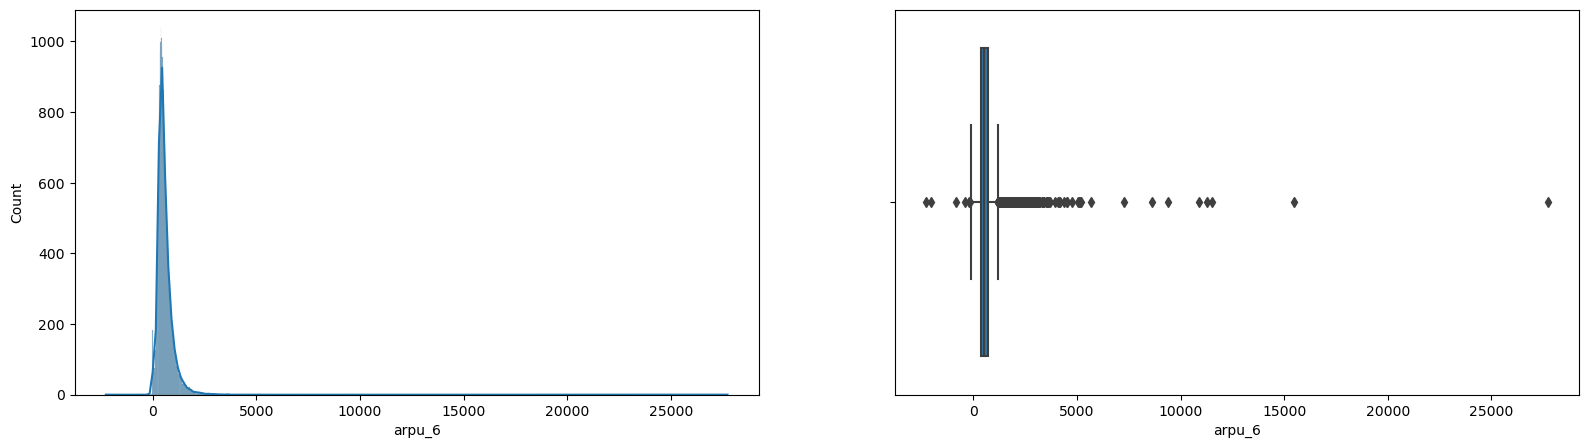

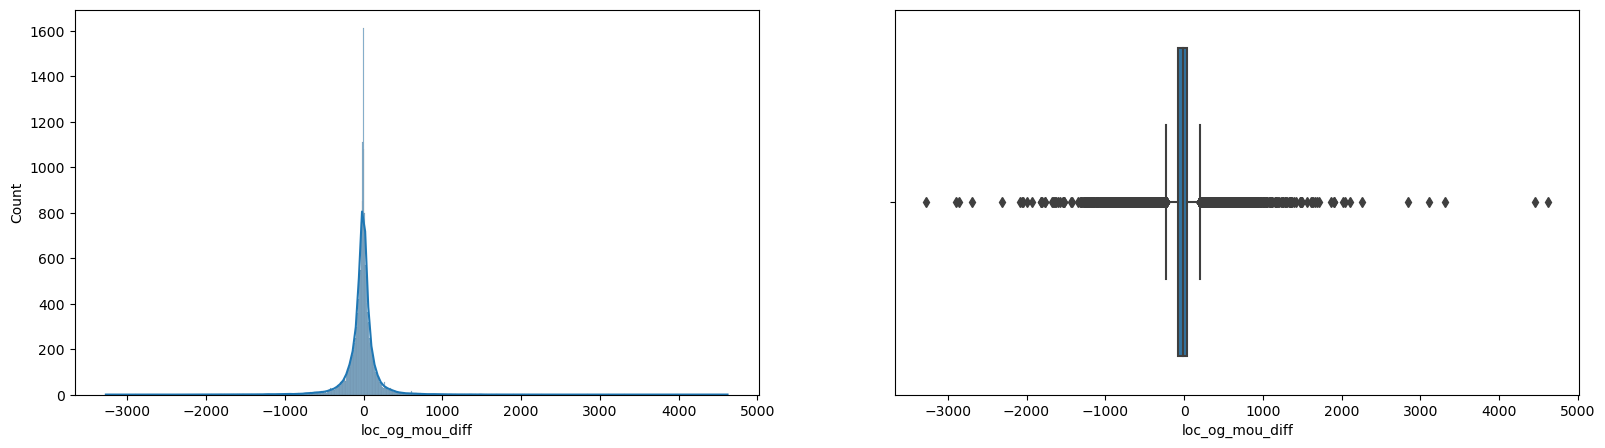

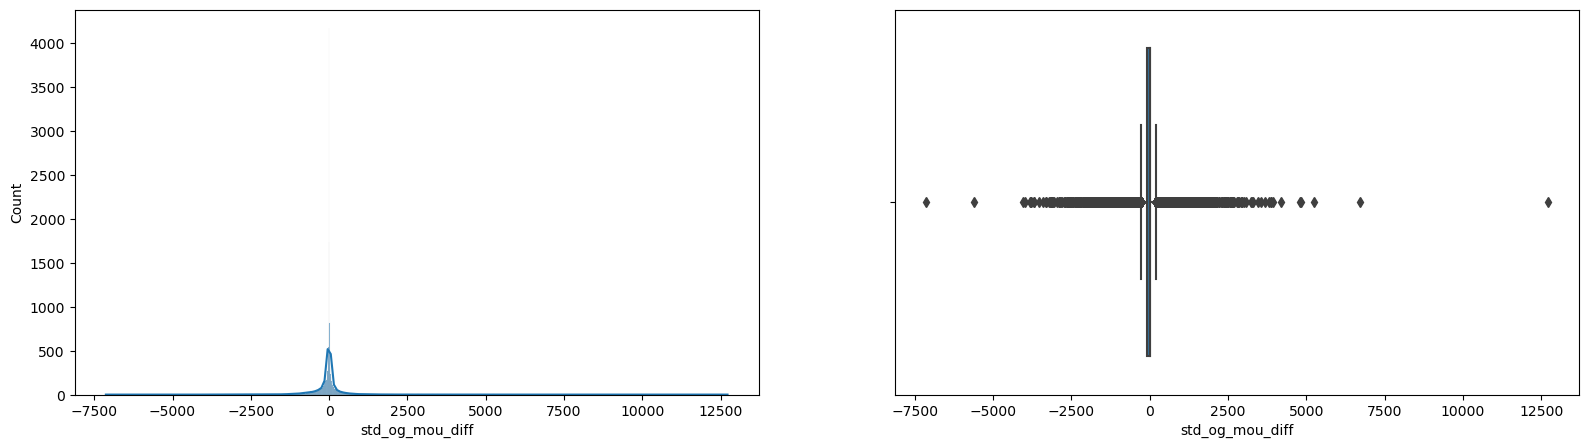

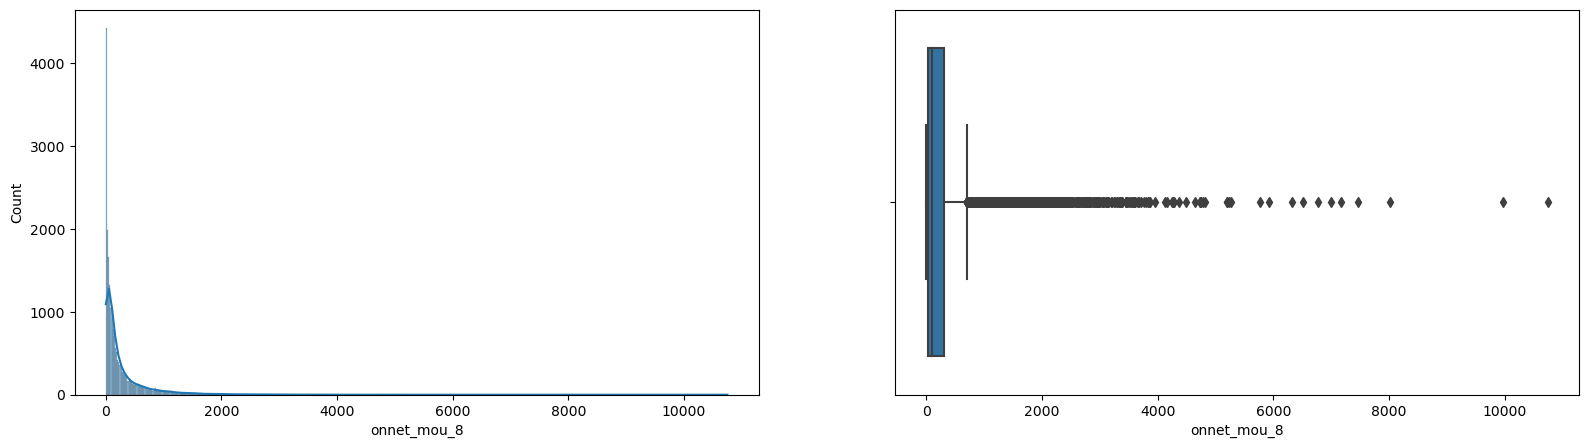

In [64]:
# iterating over list to show histplot and boxplot for important variables 
cols_to_analyse__univariate = ['total_og_mou_diff','arpu_diff','arpu_6','loc_og_mou_diff','std_og_mou_diff','onnet_mou_8']

for feature in cols_to_analyse__univariate:
    plt.figure(figsize=(30,5))
    plt.subplot(1,3,1)
    sns.histplot(x=df[feature],kde=True)
    plt.subplot(1,3,2)
    sns.boxplot(x=df[feature])
    plt.show()

## Bivariate Analysis

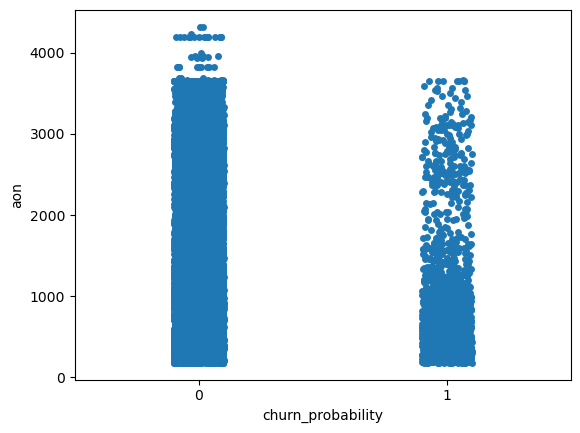

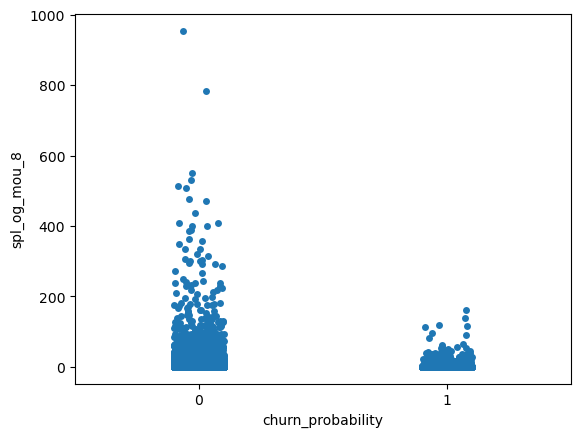

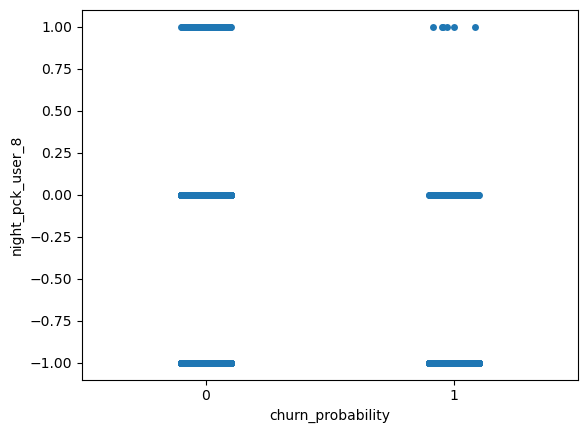

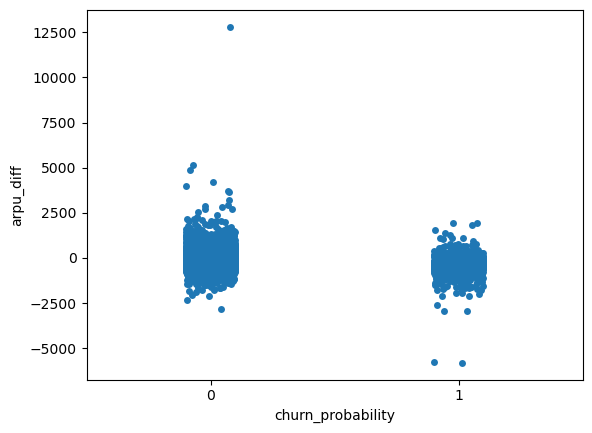

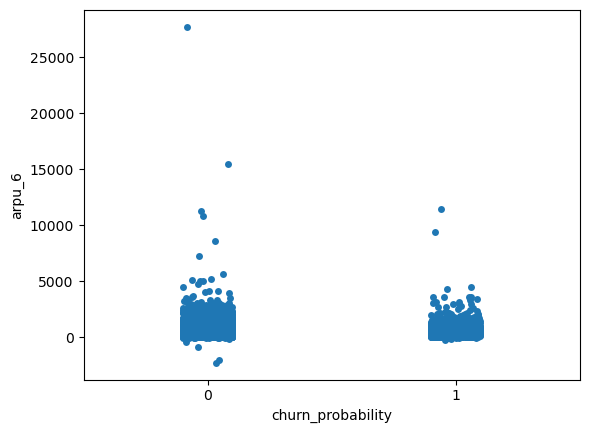

In [65]:
# iterating over list to show stripplot between important variables and target variable
cols_to_analyse__bivariate = ['aon','spl_og_mou_8','night_pck_user_8','arpu_diff','arpu_6']

for feature in cols_to_analyse__bivariate:
    sns.stripplot(x='churn_probability',y=feature,data=df)
    plt.show()

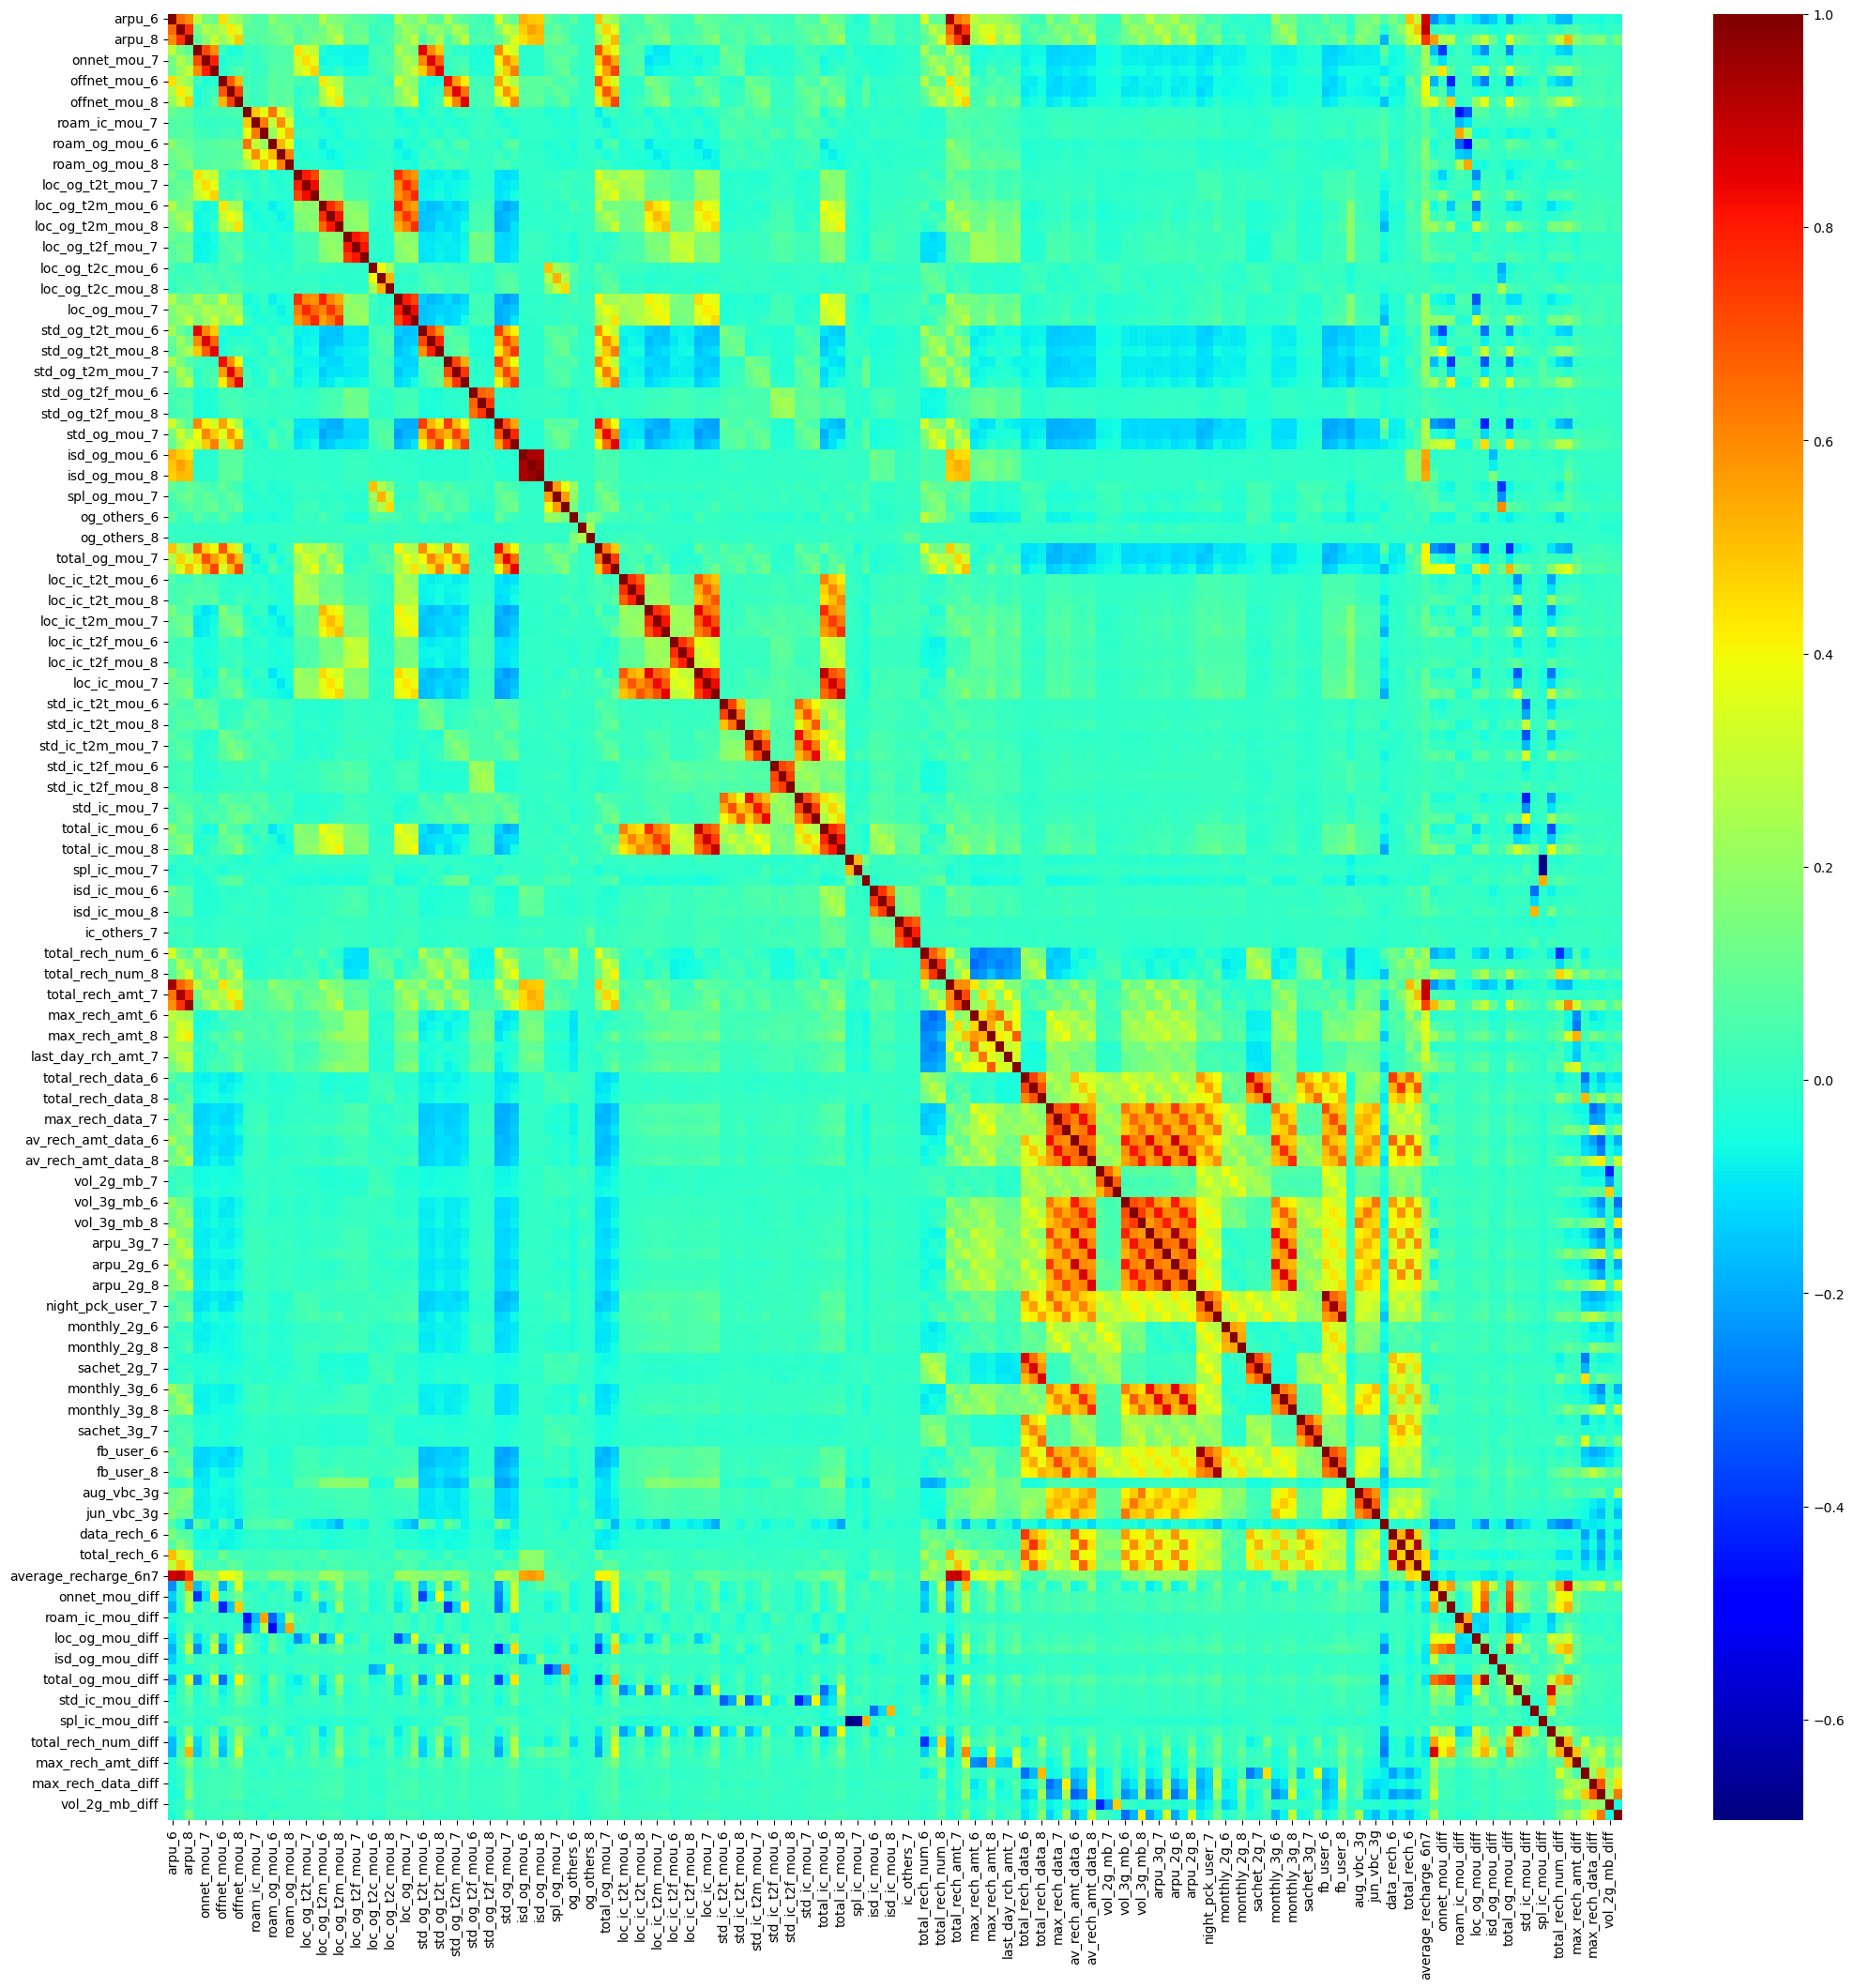

In [66]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap='jet')
plt.show()

## Model Building

In [67]:
# importing models and other function to help in machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import sensitivity_specificity_support 

from imblearn.over_sampling import SMOTE
from imblearn.metrics import sensitivity_specificity_support

In [68]:
# creating x and y variables
X = df.drop(['churn_probability'],axis=1)
y = df['churn_probability']

In [69]:
# splitting the data 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3,stratify=y,random_state=100,shuffle=True)

In [70]:
# using smote to balance out the huge imbalance we have in target variable
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [71]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: churn_probability, dtype: float64

```
Handled class imbalance.
```

In [72]:
# scaling the datasets
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [73]:
# scaling the final submissino dataset
final_submission_dataframe[final_submission_dataframe.columns] = scaler.transform(final_submission_dataframe[final_submission_dataframe.columns]) 
final_submission_dataframe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,data_rech_6,data_rech_7,total_rech_6,total_rech_7,average_recharge_6n7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,-1.048220,-1.069409,-0.679399,-0.593520,-0.575544,-0.421672,-0.749517,-0.774782,-0.562894,-0.230393,-0.224057,-0.229322,-0.255311,-0.299144,-0.290155,-0.241285,-0.249967,-0.172083,-0.606701,-0.621732,-0.506732,-0.317751,0.490046,-0.271269,-0.211842,-0.189127,-0.214654,-0.555397,-0.529071,-0.437954,-0.499082,-0.481391,-0.358685,-0.455292,-0.512477,-0.314156,-0.140126,-0.147508,-0.13213,-0.669426,-0.686377,-0.450901,-0.06642,-0.051587,-0.040287,-0.352327,-0.339079,-0.293487,-0.384225,-0.0298,-0.013221,-0.922371,-0.908732,-0.615734,-0.207522,-0.114086,-0.168041,-0.649945,-0.677072,-0.501423,-0.321172,-0.302426,-0.267905,-0.590653,-0.555846,-0.469302,-0.238807,-0.207205,-0.204113,-0.335466,-0.326977,-0.205886,-0.131513,-0.14393,-0.102803,-0.390610,-0.362083,-0.267651,-0.697680,-0.650736,-0.517727,2.48679,2.651174,4.270478,-0.196343,-0.179839,-0.146796,-0.083243,-0.08668,-0.073733,-0.814674,-0.734825,-0.469020,-1.053299,-1.015542,-0.651792,-0.685643,-0.753184,-0.585356,-0.528604,-0.458792,-0.554758,-0.403897,-0.376955,-0.358229,-0.468087,-0.444545,-0.394664,-0.433615,-0.425282,-0.367068,-0.261097,-0.251746,-0.198174,-0.280048,-0.272543,-0.238234,-0.297687,-0.289535,-0.251476,-0.319101,-0.300937,-0.256848,-0.705361,-0.684527,-0.625266,-0.249644,-0.253488,-0.229207,-0.258726,-0.25554,-0.266173,-0.259903,-0.246184,-0.223727,-0.147212,-0.136962,-0.117756,-0.701867,-0.680814,-0.608478,0.705206,-0.262847,-0.293424,-0.291790,-0.224859,-0.217514,

## PCA

In [74]:
# creating pca model
pca = PCA(random_state=100)
pca.fit(X_train)

PCA(random_state=100)

In [75]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Variance')

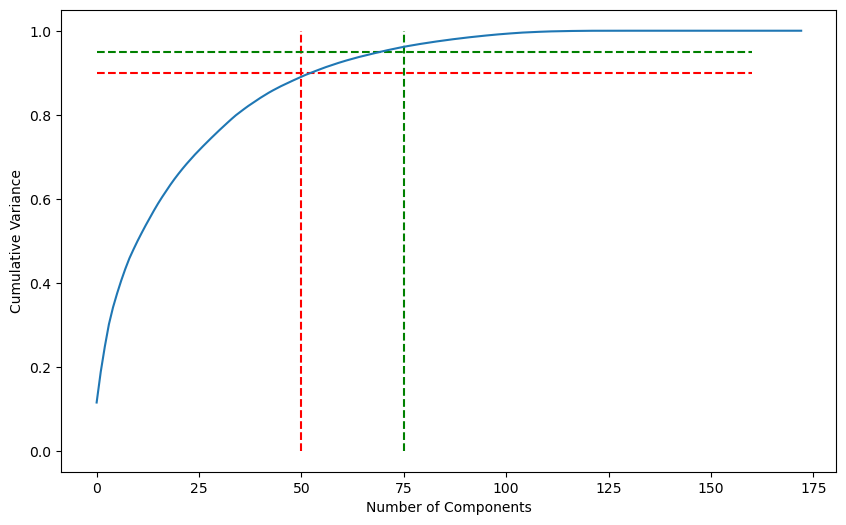

In [76]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.vlines(x=50,ymax=1,ymin=0, colors="r", linestyles="--")
plt.vlines(x=75,ymax=1,ymin=0,colors="g",linestyles="--")
plt.hlines(y=0.90,xmax=160,xmin=0,colors="r",linestyles="--")
plt.hlines(y=0.95,xmax=160,xmin=0,colors="g",linestyles="--")
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

```
90% variance is explained by around 50 variables 
```

In [77]:
# creating incremental pca model with 50 components
incrementalpca = IncrementalPCA(n_components=50)
X_train_transformed = incrementalpca.fit_transform(X_train)
X_test_transformed = incrementalpca.transform(X_test)
final_submission_dataframe_transformed = incrementalpca.transform(final_submission_dataframe)


```
Every GridSearchCV or RandomizedSearchCV scoring is recall beacuse we need to care more about churn cases than the not churn cases.

```

In [78]:
# creating a dataframe for all the models
all_model_df = pd.DataFrame({'model_type':[],'train_accuracy_score':[],'accuracy_score':[],'sensitivity/recall':[],'specificity':[],'roc_auc_score':[]})

In [79]:
# creating a function to evaluate model
def evaluate_model(y_test,y_pred):
    # model Evaluation
    # print('train accuracy score', accuracy_score(y_train,y_train_pred))
    print('Accuracy score', accuracy_score(y_test,y_pred))
    print('Recall score', recall_score(y_test,y_pred))
    print("text roc auc score", roc_auc_score(y_test,y_pred))
    confusion = confusion_matrix(y_test,y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Sensitivity
    print("Sensitivity/Recall:",TP / float(TP+FN))
    # Specificity
    print("Specificity:", TN / float(TN+FP))
    print('test confusion matrix')
    print(confusion)
    
    # return [accuracy_score(y_test,y_pred),recall_score(y_test,y_pred),TN / float(TN+FP),roc_auc_score(y_test,y_pred)]
    return {'model_type':"",'train_accuracy_score':"",'accuracy_score':accuracy_score(y_test,y_pred),'sensitivity/recall':recall_score(y_test,y_pred),'specificity':TN / float(TN+FP),'roc_auc_score':roc_auc_score(y_test,y_pred)}


## Logistic Regression with PCA

In [80]:
# creating a simple logistic regression model without any hyperparameter tuning
simple_lr = LogisticRegression()
simple_lr_model = simple_lr.fit(X_train_transformed,y_train)

In [81]:
# making predictions on model
simple_pca_logistic_train_pred = simple_lr_model.predict(X_train_transformed)
simple_pca_logistic_test_pred = simple_lr_model.predict(X_test_transformed)

In [82]:
# evaluating the model
print("Train accuracy score",accuracy_score(y_train,simple_pca_logistic_train_pred))
simple_lr_model_metrics = evaluate_model(y_test,simple_pca_logistic_test_pred)
simple_lr_model_metrics['model_type'] = 'simple_logistic_regression'
simple_lr_model_metrics['train_accuracy_score'] =  accuracy_score(y_train,simple_pca_logistic_train_pred)

all_model_df = all_model_df.append(simple_lr_model_metrics,ignore_index=True)

Train accuracy score 0.8386772052792484
Accuracy score 0.814779575007929
Recall score 0.8405017921146953
text roc auc score 0.8263921625848355
Sensitivity/Recall: 0.8405017921146953
Specificity: 0.8122825330549757
test confusion matrix
[[4669 1079]
 [  89  469]]


/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_16098/2835320009.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_model_df = all_model_df.append(simple_lr_model_metrics,ignore_index=True)


In [83]:
# hyperparameter tuning for logistic regression 
params = { "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }
stratified_kfold_lr = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)



# we are using liblinear because l1 is not supported by default solver (lbfgs)
pca_grid_search_logistic = LogisticRegression(max_iter=1000,solver="liblinear")
pca_grid_search_logistic_model = GridSearchCV(estimator=pca_grid_search_logistic,param_grid=params,scoring='recall',cv=stratified_kfold_lr,verbose=1,n_jobs=-1)
pca_grid_search_logistic_model.fit(X_train_transformed,y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [84]:
pca_grid_search_logistic_model.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [85]:
# pca_logistic = LogisticRegression(random_state=100,class_weight='balanced',C=0.001,fit_intercept=False,penalty='none')
pca_logistic = LogisticRegression(class_weight='balanced',C=0.001,penalty='l2',solver='liblinear')
pca_logistic_model = pca_logistic.fit(X_train_transformed,y_train)

In [86]:
pca_logistic_train_pred= pca_logistic_model.predict(X_train_transformed)
pca_logistic_test_pred= pca_logistic_model.predict(X_test_transformed)

In [87]:
# model Evaluation
print('train accuracy score', accuracy_score(y_train,pca_logistic_train_pred))
tuned_lr_model_metrics = evaluate_model(y_test,pca_logistic_test_pred)
tuned_lr_model_metrics['model_type'] = 'tuned_logistic_regression'
tuned_lr_model_metrics['train_accuracy_score'] =  accuracy_score(y_train,pca_logistic_train_pred)

all_model_df = all_model_df.append(tuned_lr_model_metrics,ignore_index=True)



train accuracy score 0.8348743568712251
Accuracy score 0.8109736758642563
Recall score 0.8548387096774194
text roc auc score 0.8307770444698858
Sensitivity/Recall: 0.8548387096774194
Specificity: 0.8067153792623522
test confusion matrix
[[4637 1111]
 [  81  477]]


/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_16098/76250384.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_model_df = all_model_df.append(tuned_lr_model_metrics,ignore_index=True)


In [87]:

all_model_df.head()

,model_type,train_accuracy_score,accuracy_score,sensitivity/recall,specificity,roc_auc_score
0,simple_logistic_regression,0.838677,0.814780,0.840502,0.812283,0.826392
1,tuned_logistic_regression,0.834874,0.810974,0.854839,0.806715,0.830777


### Decision Tree

In [88]:
# hyperparameter tuning of decision trees

params = { "criterion": ['gini','entropy'], 
          "max_depth":[10,20,30,40], 
          "min_samples_leaf":[10,40,50,60],
           "min_samples_split":[10,40,50,60] }

stratified_kfold_dt = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)



pca_grid_search_dt= DecisionTreeClassifier(random_state=100)
pca_grid_search_dt_model = GridSearchCV(estimator=pca_grid_search_dt,param_grid=params,scoring='recall',cv=stratified_kfold_dt,verbose=1,n_jobs=-1)
pca_grid_search_dt_model.fit(X_train_transformed,y_train)




Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [10, 40, 50, 60],
                         'min_samples_split': [10, 40, 50, 60]},
             scoring='recall', verbose=1)

In [90]:
# choosing the best estimator
pca_grid_search_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [91]:

# creating model with best params
pca_dt = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=10,
                                  min_samples_split=10)
pca_dt_model = pca_dt.fit(X_train_transformed,y_train)

In [92]:
pca_dt_train_pred= pca_dt_model.predict(X_train_transformed)
pca_dt_test_pred= pca_dt_model.predict(X_test_transformed)

In [93]:
print('train accuracy score', accuracy_score(y_train,pca_dt_train_pred))
tuned_dt_model_metrics = evaluate_model(y_test,pca_dt_test_pred)
tuned_dt_model_metrics['model_type'] = 'decision tree'
tuned_dt_model_metrics['train_accuracy_score'] =  accuracy_score(y_train,pca_dt_train_pred)

all_model_df = all_model_df.append(tuned_dt_model_metrics,ignore_index=True)


train accuracy score 0.9000447393930355
Accuracy score 0.8411037107516651
Recall score 0.7258064516129032
text roc auc score 0.7890514512761803
Sensitivity/Recall: 0.7258064516129032
Specificity: 0.8522964509394572
test confusion matrix
[[4899  849]
 [ 153  405]]


/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_11048/2335204861.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_model_df = all_model_df.append(tuned_dt_model_metrics,ignore_index=True)


In [94]:
all_model_df.head()

,model_type,train_accuracy_score,accuracy_score,sensitivity/recall,specificity,roc_auc_score
0,simple_logistic_regression,0.838677,0.814780,0.840502,0.812283,0.826392
1,tuned_logistic_regression,0.834874,0.810974,0.854839,0.806715,0.830777
2,decision tree,0.900045,0.841104,0.725806,0.852296,0.789051


## Random Forest with PCA 

In [95]:
# hyperparameter tuning for random forest

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

stratified_kfold_rf = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

pca_rf = RandomForestClassifier(random_state=100,n_jobs=-1)
pca_grid_search_rf = GridSearchCV(estimator=pca_rf, 
                           param_grid=param_grid, 
                           cv=stratified_kfold_rf, 
                           n_jobs=-1, 
                           verbose=1, 
                           scoring = "recall") 
pca_grid_search_rf.fit(X_train_transformed,y_train)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [96]:
pca_grid_search_rf.best_params_

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [97]:
# creating model from best parameters
pca_rf_best = RandomForestClassifier(bootstrap=True,max_depth=5,min_samples_leaf=50,min_samples_split=50,max_features=20,n_estimators=100)
pca_rf_model = pca_rf_best.fit(X_train_transformed,y_train)
pca_rf_train_pred= pca_rf_model.predict(X_train_transformed)
pca_rf_test_pred= pca_rf_model.predict(X_test_transformed)

In [98]:
# evaluating the model
print('train accuracy score', accuracy_score(y_train,pca_rf_train_pred))
tuned_rf_model_metrics = evaluate_model(y_test,pca_rf_test_pred)

tuned_rf_model_metrics['model_type'] = 'random forest'
tuned_rf_model_metrics['train_accuracy_score'] =  accuracy_score(y_train,pca_rf_train_pred)

all_model_df = all_model_df.append(tuned_rf_model_metrics,ignore_index=True)

train accuracy score 0.8430392961002162
Accuracy score 0.8604503647320013
Recall score 0.7706093189964157
text roc auc score 0.8198906024348815
Sensitivity/Recall: 0.7706093189964157
Specificity: 0.8691718858733473
test confusion matrix
[[4996  752]
 [ 128  430]]


/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_11048/3569285789.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_model_df = all_model_df.append(tuned_rf_model_metrics,ignore_index=True)


### XGBoost

In [99]:
param_grid = {
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[0.3,0.4,0.5]
}



pca_xgb = XGBClassifier(random_state=100,n_jobs=-1,max_depth=2,n_estimators=200)
pca_grid_search_xgb = GridSearchCV(estimator=pca_xgb,param_grid=param_grid, cv=5,n_jobs=-1,scoring='recall',verbose=1)
pca_grid_search_xgb.fit(X_train_transformed,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='recall', verbose=1)

In [100]:
pca_grid_search_xgb.best_params_

{'learning_rate': 0.3, 'subsample': 0.5}

In [101]:
pca_xgb = XGBClassifier(learning_rate=0.3,subsample=0.5,random_state=100,n_jobs=-1,n_estimators=200,max_depth=2)
pca_xgb_model = pca_xgb.fit(X_train_transformed,y_train)

In [102]:
pca_xgb_train_pred= pca_xgb_model.predict(X_train_transformed)
pca_xgb_test_pred= pca_xgb_model.predict(X_test_transformed)    


In [103]:
print('train accuracy score', accuracy_score(y_train,pca_xgb_train_pred))
tuned_xgb_model_metrics = evaluate_model(y_test,pca_xgb_test_pred)

tuned_xgb_model_metrics['model_type'] = 'xg boost'
tuned_xgb_model_metrics['train_accuracy_score'] =  accuracy_score(y_train,pca_xgb_train_pred)

all_model_df = all_model_df.append(tuned_xgb_model_metrics,ignore_index=True)

train accuracy score 0.9034374766982328
Accuracy score 0.8712337456390739
Recall score 0.7670250896057348
text roc auc score 0.8241875622002229
Sensitivity/Recall: 0.7670250896057348
Specificity: 0.8813500347947112
test confusion matrix
[[5066  682]
 [ 130  428]]


/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_11048/2929226392.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_model_df = all_model_df.append(tuned_xgb_model_metrics,ignore_index=True)


### Model Summary

In [104]:
all_model_df

,model_type,train_accuracy_score,accuracy_score,sensitivity/recall,specificity,roc_auc_score
0,simple_logistic_regression,0.838677,0.814780,0.840502,0.812283,0.826392
1,tuned_logistic_regression,0.834874,0.810974,0.854839,0.806715,0.830777
2,decision tree,0.900045,0.841104,0.725806,0.852296,0.789051
3,random forest,0.843039,0.860450,0.770609,0.869172,0.819891
4,xg boost,0.903437,0.871234,0.767025,0.881350,0.824188


### Conclusion
```
Final model will be tuned logistic regression as it has very good accuracy and also balanced recall and specificity
```

### Feature importance model 

In [105]:
# hyperparameter tuning for random forest

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20,30]
}

stratified_kfold_rf_feature_importance = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

pca_rf_feature_importance = RandomForestClassifier(random_state=100,n_jobs=-1)
pca_grid_search_rf_feature_importance = GridSearchCV(estimator=pca_rf_feature_importance, 
                           param_grid=param_grid, 
                           cv=stratified_kfold_rf_feature_importance, 
                           n_jobs=-1, 
                           verbose=1, 
                           scoring = "recall") 
pca_grid_search_rf_feature_importance.fit(X_train,y_train)



Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5),
                         'max_features': [10, 20, 30],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [106]:
pca_grid_search_rf_feature_importance.best_params_

{'max_depth': 5,
 'max_features': 30,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 300}

In [107]:
# creating model from best parameters
feature_importance_rf_best = RandomForestClassifier(bootstrap=True,max_depth=5,min_samples_leaf=50,min_samples_split=50,max_features=30,n_estimators=300)
feature_importance_rf_model = feature_importance_rf_best.fit(X_train,y_train)
feature_importance_rf_train_pred= feature_importance_rf_model.predict(X_train)
feature_importance_rf_test_pred= feature_importance_rf_model.predict(X_test)

In [108]:
feature_importance = pd.DataFrame({
    "Features": X_train.columns,
    "imp": feature_importance_rf_model.feature_importances_
})

feature_importance.sort_values(by='imp',ascending=False).head(20)

,Features,imp
80,total_ic_mou_8,0.118804
14,roam_og_mou_8,0.084061
65,loc_ic_mou_8,0.082679
59,loc_ic_t2m_mou_8,0.082611
95,total_rech_amt_8,0.073523
11,roam_ic_mou_8,0.069228
150,arpu_diff,0.057379
166,total_rech_amt_diff,0.050602
154,roam_og_mou_diff,0.037241
153,roam_ic_mou_diff,0.031404


### Important Factors of churn

- Total Recharge amount
- Total minutes of incoming calls
- Total minutes of roaming outgoing calls
- Total minutes of local incoming calls


### Top 5 important features
```
total_ic_mou_8, roam_og_mou_8, loc_ic_mou_8, loc_ic_t2m_mou_8, total_rech_amt_8
```

### Recommendations

- The company should focus on reducing roaming charges or provide discounted prices for roaming customers.
- Total Recharge amount seems to be important feature in predicting churn. So the company should keep an eye on this value.
- The company should focus on increaing the total incoming call minutes.

## For Kaggle Competition

- Kaggle competition is more focused on accuracy so we will make new models with accuracy in mind 


### Logistic Regression without PCA

In [111]:
lr = LogisticRegression(max_iter=1000)
lr_model = lr.fit(X_train,y_train)
lr_train_pred = lr_model.predict(X_train) 
lr_test_pred = lr_model.predict(X_test) 

print(accuracy_score(y_train,lr_train_pred))
evaluate_model(y_test,lr_test_pred)
print('')

0.8991126687047946
Accuracy score 0.8666349508404694
Recall score 0.7078853046594982
text roc auc score 0.7949656168391437
Sensitivity/Recall: 0.7078853046594982
Specificity: 0.8820459290187892
test confusion matrix
[[5070  678]
 [ 163  395]]



```
Accuracy of 0.86
```

### XGBoost without PCA 

In [113]:
param_grid = {
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[0.3,0.4,0.5]
}



xgb = XGBClassifier(random_state=100,n_jobs=-1,max_depth=2,n_estimators=200)
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid, cv=5,n_jobs=-1,scoring='accuracy',verbose=1)
grid_search_xgb.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='accuracy', verbose=1)

In [114]:
grid_search_xgb.best_params_

{'learning_rate': 0.2, 'subsample': 0.4}

In [113]:
xgb_best = XGBClassifier(random_state=100,n_jobs=-1,max_depth=2,n_estimators=200,learning_rate=0.2,subsample=0.4)

xgb_best_model = xgb_best.fit(X_train,y_train)
xgb_train_pred = xgb_best_model.predict(X_train)
xgb_test_pred = xgb_best_model.predict(X_test)

In [114]:
print(accuracy_score(y_train,xgb_train_pred))
evaluate_model(y_test,xgb_test_pred)
print("")

0.9575721422712699
Accuracy score 0.9232477006026008
Recall score 0.7060931899641577
text roc auc score 0.8252108260189613
Sensitivity/Recall: 0.7060931899641577
Specificity: 0.9443284620737648
test confusion matrix
[[5428  320]
 [ 164  394]]



```
Accuracy of 0.92. We can use this model to predict on test.csv
```

### Decision Tree without PCA

In [128]:
# hyperparameter tuning of decision trees

params = { "criterion": ['gini','entropy'], 
          "max_depth":[10,20,30,40], 
          "min_samples_leaf":[10,40,50,60],
           "min_samples_split":[10,40,50,60] }

stratified_kfold_dt_kaggle = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)



grid_search_dt_kaggle= DecisionTreeClassifier(random_state=100)
grid_search_dt_kaggle_model = GridSearchCV(estimator=grid_search_dt_kaggle,param_grid=params,scoring='accuracy',cv=stratified_kfold_dt_kaggle,verbose=1,n_jobs=-1)
grid_search_dt_kaggle_model.fit(X_train,y_train)




Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [10, 40, 50, 60],
                         'min_samples_split': [10, 40, 50, 60]},
             scoring='accuracy', verbose=1)

In [129]:
grid_search_dt_kaggle_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [130]:
dt_kaggle_best = DecisionTreeClassifier(random_state=100,criterion='entropy',max_depth=10,min_samples_leaf=10,min_samples_split=10)
dt_kaggle_best_model = dt_kaggle_best.fit(X_train,y_train)
dt_kaggle_train_pred = dt_kaggle_best_model.predict(X_train)
dt_kaggle_test_pred = dt_kaggle_best_model.predict(X_test)

In [131]:
print(accuracy_score(y_train,dt_kaggle_train_pred))
evaluate_model(y_test,dt_kaggle_test_pred)
print("")

0.9436656476027142
Accuracy score 0.8867745004757374
Recall score 0.7240143369175627
text roc auc score 0.8132945727733255
Sensitivity/Recall: 0.7240143369175627
Specificity: 0.9025748086290883
test confusion matrix
[[5188  560]
 [ 154  404]]


{'model_type': '',
 'train_accuracy_score': '',
 'accuracy_score': 0.8867745004757374,
 'sensitivity/recall': 0.7240143369175627,
 'specificity': 0.9025748086290883,
 'roc_auc_score': 0.8132945727733255}

```
Accuracy of 0.88.
```

```
The best model with highest accuracy is XG boost without pca. we will use this model to create sample.csv
```

In [132]:
# predicting final values with best model
final_submission_dataframe_transformed_pred = xgb_best_model.predict(final_submission_dataframe)

In [133]:
# reading the test.csv for making sample.csv
kaggle_test_dataset_copy = pd.read_csv('./test.csv')

In [134]:
# creating sample.csv
sample = pd.DataFrame({
    'id': kaggle_test_dataset_copy['id'],
    'churn_probability': final_submission_dataframe_transformed_pred
})
sample.set_index('id',inplace=True)

sample.head()

,churn_probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0


In [135]:
# checking the distribution
sample['churn_probability'].value_counts(normalize=True)

0    0.850767
1    0.149233
Name: churn_probability, dtype: float64

In [136]:
# checking the shape before submission
sample.shape

(30000, 1)

In [137]:
# creating sample.csv file
# sample.to_csv("./sample.csv")